Data loaded successfully
Date processing complete
Model fitting complete
Predicted Temperature on Day 9265: 79.19°C


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


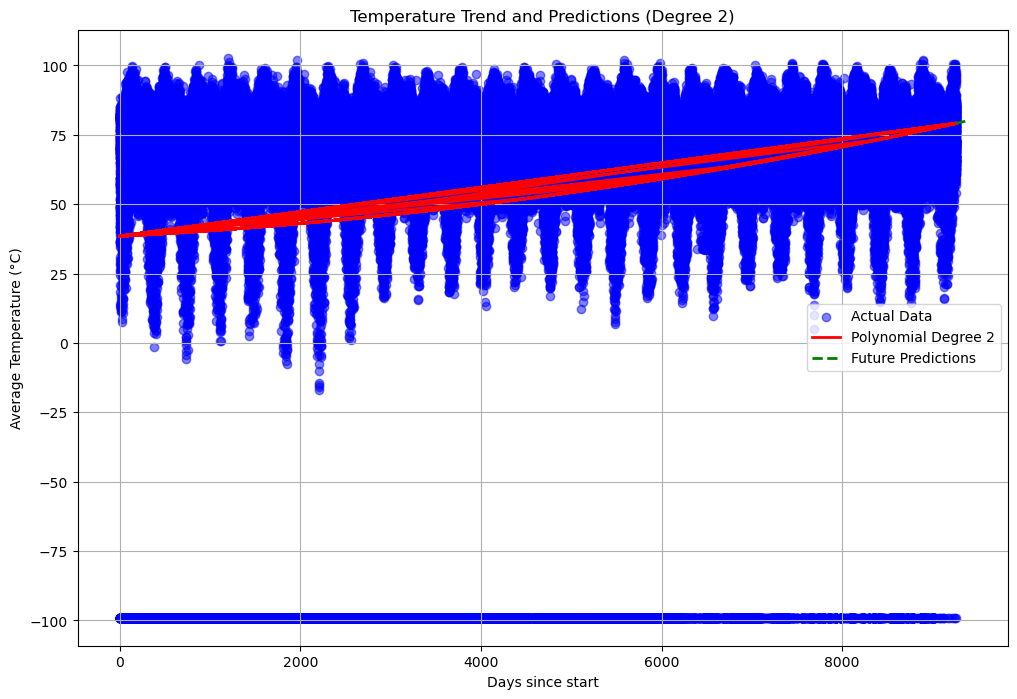

Plot displayed successfully


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


file_path = 'C:/Users/Samuel/Desktop/Academics/Programming/My python stuff/city_temperature.csv'
data = pd.read_csv(
    file_path, 
    dtype={
        'Region': str,
        'Country': str,
        'State': str,
        'City': str,
        'Month': int,
        'Day': int,
        'Year': int,
        'AvgTemperature': float
    },
    nrows=296706  
)
print("Data loaded successfully")


data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], errors='coerce')

data = data.dropna(subset=['Date'])


data['Day_Number'] = (data['Date'] - data['Date'].min()).dt.days
print("Date processing complete")


X = data['Day_Number'].values.reshape(-1, 1)
y = data['AvgTemperature'].values.reshape(-1, 1)

degree = 2 
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
print("Model fitting complete")


future_day = data['Day_Number'].max() + 1
future_day_poly = poly.transform(np.array([[future_day]]))
predicted_temp = model.predict(future_day_poly)
print(f"Predicted Temperature on Day {future_day}: {predicted_temp[0][0]:.2f}°C")


X_poly = poly.transform(X)
predicted_temperatures = model.predict(X_poly)

plt.figure(figsize=(12, 8))


plt.scatter(data['Day_Number'], y, color='blue', label='Actual Data', alpha=0.5)

plt.plot(data['Day_Number'], predicted_temperatures, color='red', linewidth=2, label=f'Polynomial Degree {degree}')


future_days = np.arange(data['Day_Number'].max() + 1, data['Day_Number'].max() + 101).reshape(-1, 1)
future_days_poly = poly.transform(future_days)
future_temps = model.predict(future_days_poly)

plt.plot(future_days, future_temps, color='green', linestyle='--', linewidth=2, label='Future Predictions')

plt.xlabel('Days since start')
plt.ylabel('Average Temperature (°C)')
plt.title(f'Temperature Trend and Predictions (Degree {degree})')
plt.legend()
plt.grid(True)

plt.show()  
print("Plot displayed successfully")

In [3]:

mse = mean_squared_error(y, predicted_temperatures)


r2 = r2_score(y, predicted_temperatures)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2869.3967462654255
R-squared: 0.045333370314282195
